In [18]:
import numpy as np
import scipy
import random
import scipy.sparse
from sklearn.datasets import fetch_20newsgroups
import gensim
from collections import Counter
import heapq
import nltk
from nltk.corpus import stopwords
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
import pickle
%matplotlib inline

In [81]:
font = {'family' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

# Topics number dependency

In [3]:
def investigate(pickle_path, value='ums', fst_y_axis_name='Uniqueness measure', picture_path=None):
    with open(pickle_path, 'r') as f:
        d = pickle.load(f)

    def m_plot(val_name, err_name, normalize=False):
        val = np.array(d[val_name])
        err = np.array(d[err_name])

        if normalize:
            norm = np.max(val)
            val /= norm
            err /= norm

        plt.plot(d['topics_values'], val)
        plt.fill_between(d['topics_values'], val - err, val + err, alpha=0.5, facecolor='yellow')
        
    def m_plot2(val_name):
        val = np.array(d[val_name])
        s = int(0.3 * (len(val) - 1))
        algo = LinearRegression().fit([[x] for x in d['topics_values'][s:]], val[s:])
        plt.plot(d['topics_values'], algo.predict([[x] for x in d['topics_values']]))

    plt.figure(figsize=(12, 10))

    plt.subplot(211)
    plt.xlabel('Topics number')
    plt.ylabel(fst_y_axis_name)

    m_plot('avg_{}_values'.format(value), 'avg_{}_values_err'.format(value))
    m_plot('max_{}_values'.format(value), 'max_{}_values_err'.format(value))
    m_plot('min_{}_values'.format(value), 'min_{}_values_err'.format(value))
    m_plot2('avg_{}_values'.format(value))

    plt.legend(['avg', 'max', 'min'], loc='lower right')
    plt.grid()

    plt.subplot(212)
    plt.xlabel('Topics number')
    plt.ylabel('Peplexity')

    m_plot('train_perplexity_values', 'train_perplexity_values_err')
    m_plot('test_perplexity_values', 'test_perplexity_values_err')

    plt.legend(['train', 'test'], loc='lower right')
    plt.grid()
    
    if picture_path is not None:
        plt.savefig(picture_path, format='eps')

    plt.show()

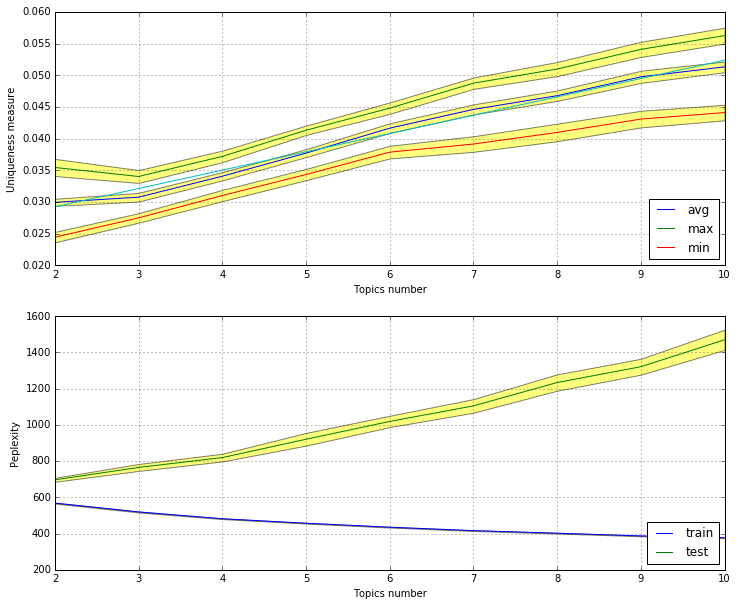

In [88]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_1.pkl',
    value='ums',
    fst_y_axis_name='Uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_1_ums.eps'
)

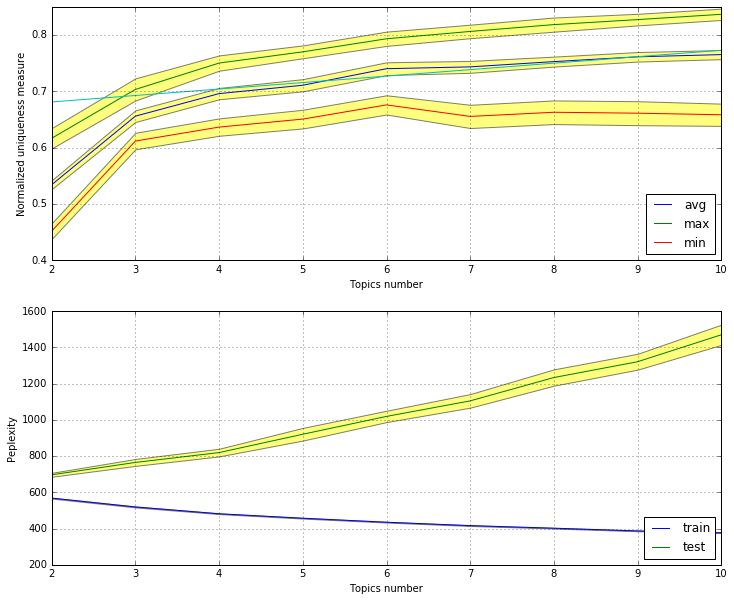

In [89]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_1.pkl',
    value='nums',
    fst_y_axis_name='Normalized uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_1_nums.eps'
)

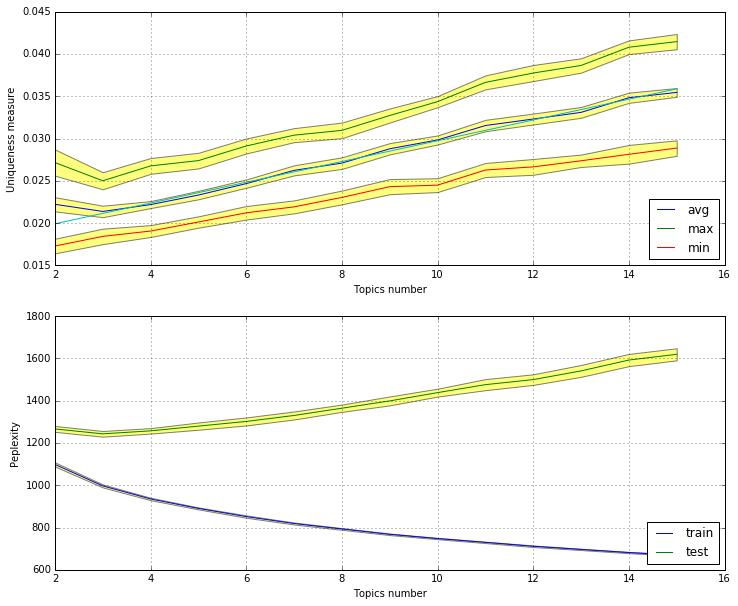

In [90]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_2.pkl',
    value='ums',
    fst_y_axis_name='Uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_2_ums.eps'
)

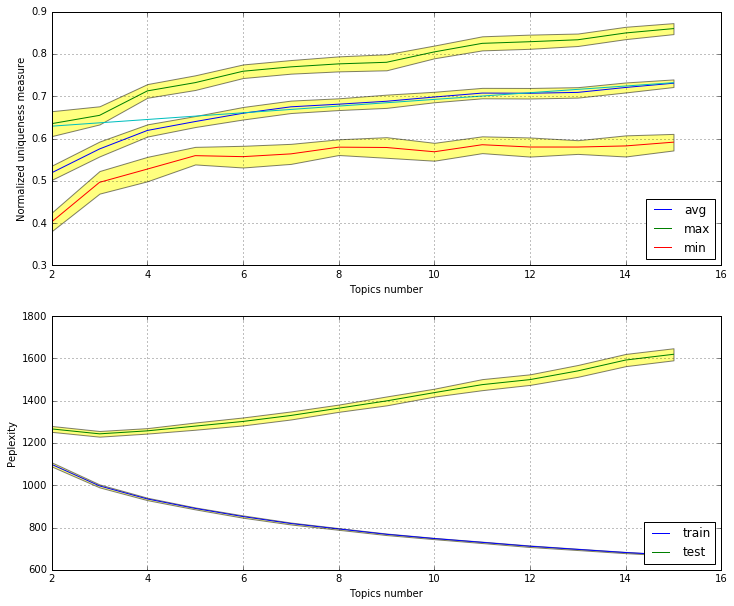

In [91]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_2.pkl',
    value='nums',
    fst_y_axis_name='Normalized uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_2_nums.eps'
)

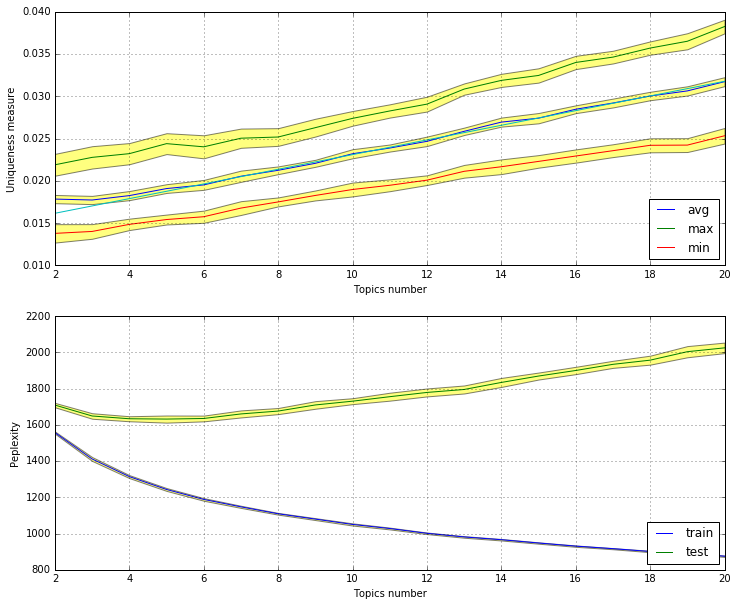

In [92]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_3.pkl',
    value='ums',
    fst_y_axis_name='Uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_3_ums.eps'
)

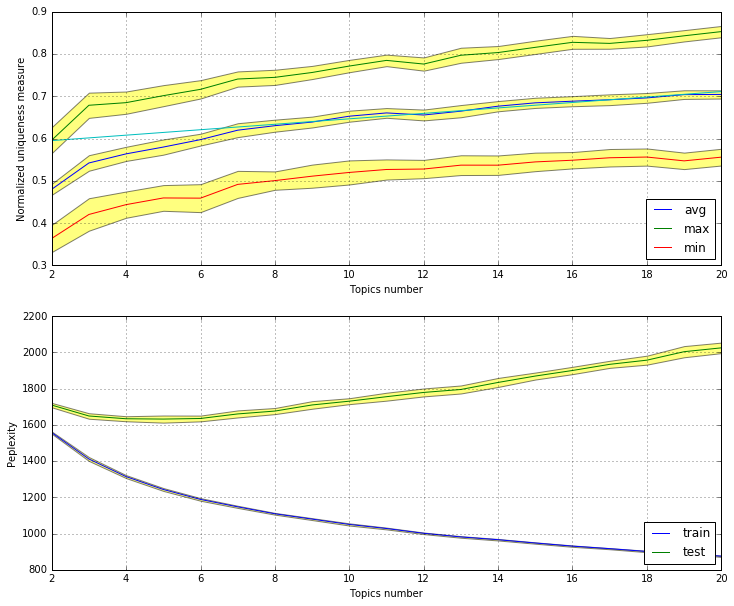

In [93]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_3.pkl',
    value='nums',
    fst_y_axis_name='Normalized uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_3_nums.eps'
)

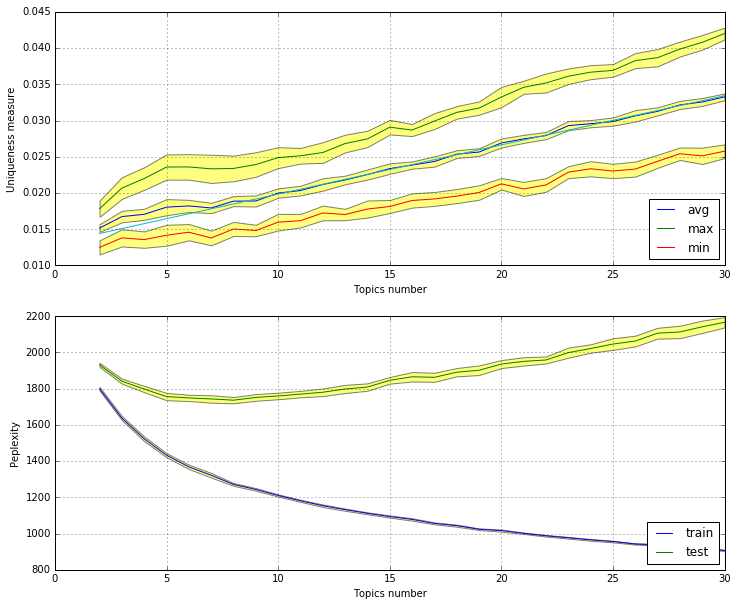

In [94]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_4.pkl',
    value='ums',
    fst_y_axis_name='Uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_4_ums.eps'
)

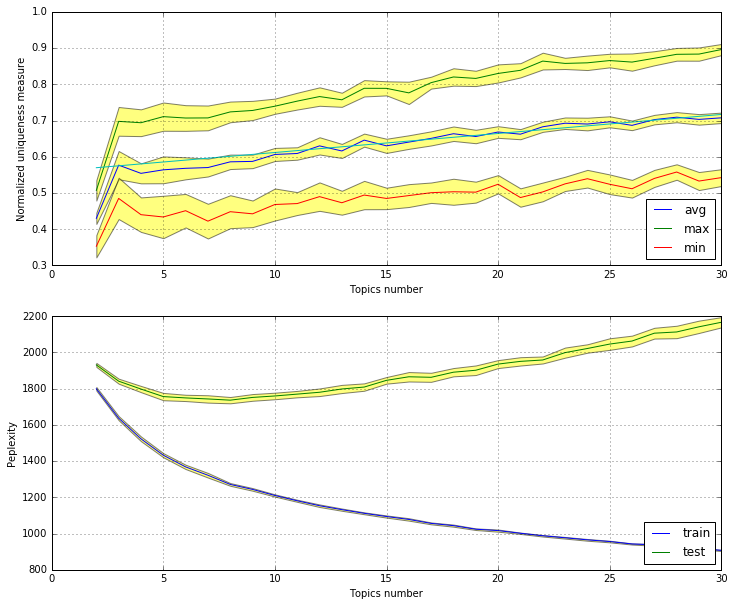

In [95]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_4.pkl',
    value='nums',
    fst_y_axis_name='Normalized uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_4_nums.eps'
)

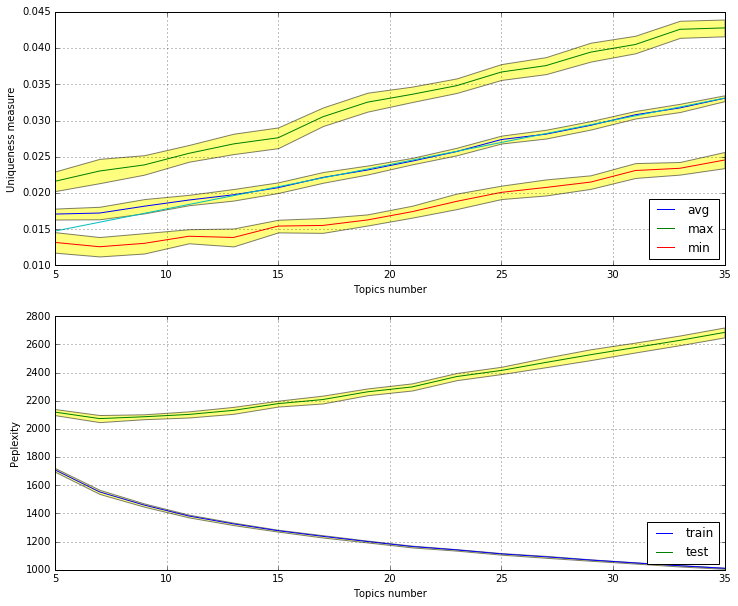

In [96]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_big.pkl',
    value='ums',
    fst_y_axis_name='Uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_big_ums.eps'
)

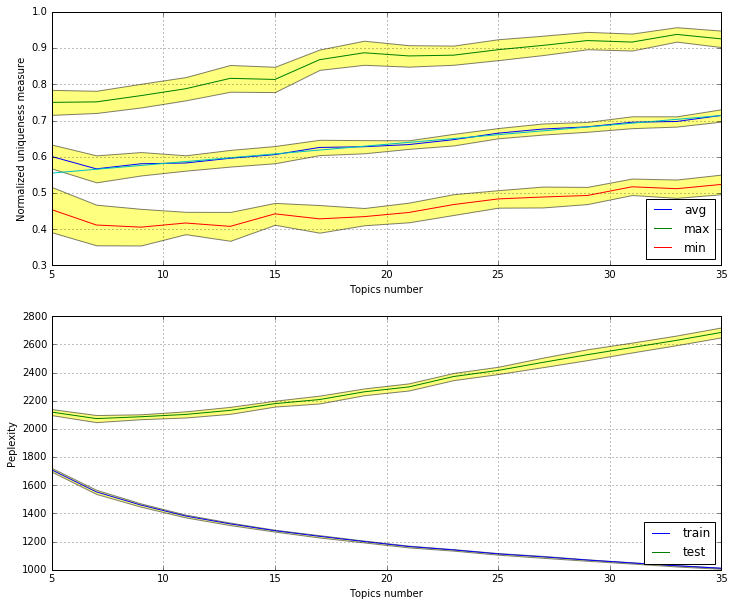

In [97]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_big.pkl',
    value='nums',
    fst_y_axis_name='Normalized uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_big_nums.eps'
)

# Sparsity dependency

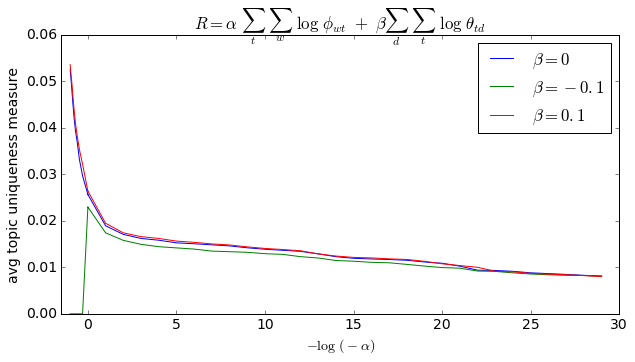

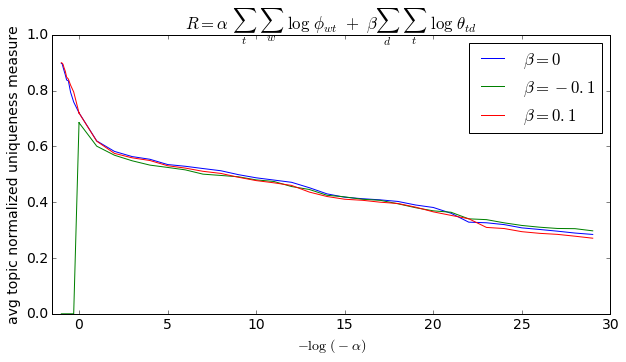

In [14]:
with open('uniqueness_exp//alpha_dependency_3.pkl', 'r') as f:
    d = pickle.load(f)
    
plt.figure(figsize=(10, 5))
plt.title('$R = \\alpha\\ \\sum_t\\ \\sum_w\\ \\log\\ \\phi_{wt}\\ +\\ \\beta \\sum_d\\ \\sum_t\\ \\log\\ \\theta_{td}$')
plt.xlabel('$- \\log\\ (- \\alpha)$')
plt.ylabel('avg topic uniqueness measure')
plt.xlim(-1.5, 30)
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures'])
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures2'])
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures3'])
plt.legend(['$\\beta = 0$', '$\\beta = -0.1$', '$\\beta = 0.1$'])
plt.savefig('uniqueness_perp/pictures/alpha_dependency_topics_origin_3_ums.eps', format='eps')
plt.show()


plt.figure(figsize=(10, 5))
plt.title('$R = \\alpha\\ \\sum_t\\ \\sum_w\\ \\log\\ \\phi_{wt}\\ +\\ \\beta \\sum_d\\ \\sum_t\\ \\log\\ \\theta_{td}$')
plt.xlabel('$- \\log\\ (- \\alpha)$')
plt.ylabel('avg topic normalized uniqueness measure')
plt.ylim(0, 1)
plt.xlim(-1.5, 30)
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures'])
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures2'])
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures3'])
plt.legend(['$\\beta = 0$', '$\\beta = -0.1$', '$\\beta = 0.1$'])
plt.savefig('uniqueness_perp/pictures/alpha_dependency_topics_origin_3_nums.eps', format='eps')
plt.show()

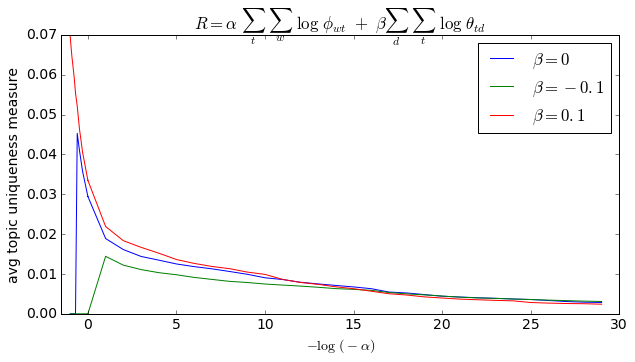

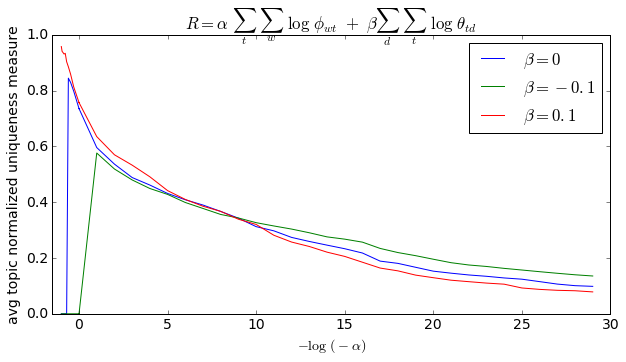

In [15]:
with open('uniqueness_perp/alpha_dependency_7.pkl', 'r') as f:
    d = pickle.load(f)
    
plt.figure(figsize=(10, 5))
plt.title('$R = \\alpha\\ \\sum_t\\ \\sum_w\\ \\log\\ \\phi_{wt}\\ +\\ \\beta \\sum_d\\ \\sum_t\\ \\log\\ \\theta_{td}$')
plt.xlabel('$- \\log\\ (- \\alpha)$')
plt.ylabel('avg topic uniqueness measure')
plt.xlim(-1.5, 30)
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures'])
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures2'])
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures3'])
plt.legend(['$\\beta = 0$', '$\\beta = -0.1$', '$\\beta = 0.1$'])
plt.savefig('uniqueness_perp/pictures/alpha_dependency_topics_origin_7_ums.eps', format='eps')
plt.show()


plt.figure(figsize=(10, 5))
plt.title('$R = \\alpha\\ \\sum_t\\ \\sum_w\\ \\log\\ \\phi_{wt}\\ +\\ \\beta \\sum_d\\ \\sum_t\\ \\log\\ \\theta_{td}$')
plt.xlabel('$- \\log\\ (- \\alpha)$')
plt.ylabel('avg topic normalized uniqueness measure')
plt.ylim(0, 1)
plt.xlim(-1.5, 30)
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures'])
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures2'])
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures3'])
plt.legend(['$\\beta = 0$', '$\\beta = -0.1$', '$\\beta = 0.1$'])
plt.savefig('uniqueness_perp/pictures/alpha_dependency_topics_origin_7_nums.eps', format='eps')
plt.show()

In [58]:
alpha_values = [
    - 10 ** (-i)
    for i in xrange(30)
]

In [69]:
beta = 0
mean_normalized_uniqueness_measures = []
min_normalized_uniqueness_measures = []
max_normalized_uniqueness_measures = []
mean_uniqueness_measures = []
min_uniqueness_measures = []
max_uniqueness_measures = []

for alpha in alpha_values:
    with open('uniqueness_exp/alpha_exp/alpha_exp_20news_10t_base_{}_{}.pkl'.format(alpha, beta), 'r') as f:
        d = pickle.load(f)
    
    mean_normalized_uniqueness_measures.append(np.mean(d['normalized_uniqueness_measures']))
    min_normalized_uniqueness_measures.append(np.min(d['normalized_uniqueness_measures']))
    max_normalized_uniqueness_measures.append(np.max(d['normalized_uniqueness_measures']))
    
    mean_uniqueness_measures.append(np.mean(d['uniqueness_measures']))
    min_uniqueness_measures.append(np.min(d['uniqueness_measures']))
    max_uniqueness_measures.append(np.max(d['uniqueness_measures']))
    
mean_normalized_uniqueness_measures = np.array(mean_normalized_uniqueness_measures)
min_normalized_uniqueness_measures = np.array(min_normalized_uniqueness_measures)
max_normalized_uniqueness_measures = np.array(max_normalized_uniqueness_measures)
mean_uniqueness_measures = np.array(mean_uniqueness_measures)
min_uniqueness_measures = np.array(min_uniqueness_measures)
max_uniqueness_measures = np.array(max_uniqueness_measures)

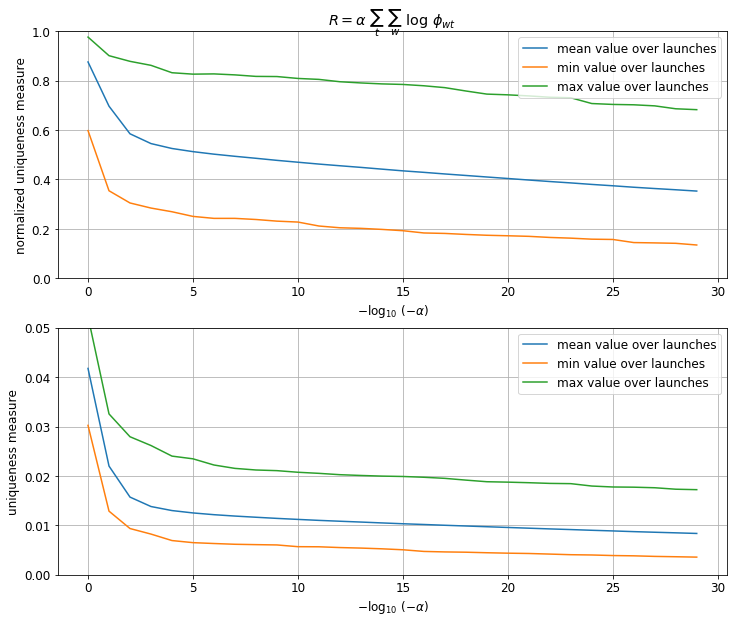

In [82]:
plt.figure(figsize=(12, 10))

plt.subplot(211)
plt.title('$R = \\alpha\\ \\sum_t\\ \\sum_w\\ \\log\\ \\phi_{wt}$')

plt.xlabel('$- \\log_{10}\\ (- \\alpha)$')
plt.ylabel('normalized uniqueness measure')
plt.ylim(0, 1)

plt.plot(range(30), mean_normalized_uniqueness_measures)
plt.plot(range(30), min_normalized_uniqueness_measures)
plt.plot(range(30), max_normalized_uniqueness_measures)

plt.legend([
    'mean value over launches',
    'min value over launches',
    'max value over launches'
])

plt.grid()

plt.subplot(212)

plt.xlabel('$- \\log_{10}\\ (- \\alpha)$')
plt.ylabel('uniqueness measure')
plt.ylim(0, 0.05)

plt.plot(range(30), mean_uniqueness_measures)
plt.plot(range(30), min_uniqueness_measures)
plt.plot(range(30), max_uniqueness_measures)

plt.legend([
    'mean value over launches',
    'min value over launches',
    'max value over launches'
])

plt.grid()

plt.savefig('uniqueness_exp/alpha_exp/plot.eps', format='eps')

plt.show()

# Check uniqueness

In [115]:
def plot_tsne(phis, colors, perplexity, picture_path=None, title=''):
    font = {'family' : 'normal',
        'size'   : 18}
    plt.rc('font', **font)

    model = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    X = model.fit_transform(phis) 
    plt.figure(figsize=(10, 8))
    plt.xlim(0.95 * min(X[:, 0]), 1.05 * max(X[:, 0]))
    plt.ylim(0.95 * min(X[:, 1]), 1.05 * max(X[:, 1]))
    size = (np.max(X[:, 0]) - np.min(X[:, 0])) * 0.1
    sc = plt.scatter(X[:, 0], X[:, 1], size, c=colors)
    #plt.colorbar(sc)
    plt.title(title)
    
    if picture_path is not None:
        plt.savefig(picture_path, format='eps')
    plt.show()

In [5]:
def smape_dist(a, b):
    indices = (a > 1e-20) | (b > 1e-20)
    fst = a[indices]
    snd = b[indices]
    return np.mean(2. * np.abs(fst - snd) / (np.abs(fst) + np.abs(snd)))

def mae_dist(a, b):
    indices = (a > 1e-20) | (b > 1e-20)
    fst = a[indices]
    snd = b[indices]
    return np.sum(np.abs(fst - snd))

def kl_dist(a, b):
    indices = (a > 1e-20)
    return np.sum(np.log(a[indices] / b[indices]) * a[indices])

def kl2_dist(a, b):
    c = (a + b) / 2.
    return kl_dist(a, c) + kl_dist(b, c)

def greed_match(fst, snd, dst_fun, shape=None):
    if shape is not None:
        T, W = shape
        fst = fst.reshape(shape)
        snd = snd.reshape(shape)
    else:
        T, W = fst.shape
    dists = []
    for t1 in xrange(T):
        dists.append(min(
            dst_fun(fst[t1, :], snd[t2, :])
            for t2 in xrange(T)
        ))
    return np.mean(dists)

In [16]:
def investigate_matrix_variance(matrices, title_prefix='', shape=None, max_size=None):
    font = {'family' : 'normal',
        'size'   : 10}
    plt.rc('font', **font)
    smapes = []
    maes = []
    kls = []
    kl2s = []
    pairs = [
        (i, j)
        for i in xrange(len(matrices))
        for j in xrange(len(matrices))
    ]
    if max_size is not None:
        random.seed(42)
        pairs = random.sample(pairs, max_size)
    
    for i, j in pairs:
        if i < j:
            maes.append(greed_match(matrices[i], matrices[j], mae_dist, shape))
            smapes.append(greed_match(matrices[i], matrices[j], smape_dist, shape))
            kls.append(greed_match(matrices[i], matrices[j], kl_dist, shape))
            kl2s.append(greed_match(matrices[i], matrices[j], kl2_dist, shape))
            #smapes.append(smape_dist(matrices[i], matrices[j]))
            #maes.append(mae_dist(matrices[i], matrices[j]))
            #kls.append(kl_dist(matrices[i], matrices[j]))
            #kl2s.append(kl2_dist(matrices[i], matrices[j]))
                
    print 'Average pairwise MAE: {}'.format(np.mean(maes))
    print 'Pairwise MAE std: {}'.format(3. / np.sqrt(len(maes)) * np.std(maes))
    print '\n'
    print 'Average pairwise sMAPE: {}'.format(np.mean(smapes))
    print 'Pairwise sMAPE std: {}'.format(3. / np.sqrt(len(smapes)) * np.std(smapes))
    print '\n'
    print 'Average pairwise KL: {}'.format(np.mean(kls))
    print 'Pairwise KL std: {}'.format(3. / np.sqrt(len(kls)) * np.std(kls))
    print '\n'
    print 'Average pairwise KL2: {}'.format(np.mean(kl2s))
    print 'Pairwise KL2 std: {}'.format(3. / np.sqrt(len(kl2s)) * np.std(kl2s))

In [7]:
def investigate_scalar_variance(values, title_prefix=''):
    font = {'family' : 'normal',
        'size'   : 10}
    plt.rc('font', **font)
    plt.title(title_prefix + ' value distribution')
    plt.hist(values, bins=50)
    plt.show()
    
    smapes = []
    maes = []
    for i in xrange(len(values)):
        for j in xrange(len(values)):
            if i < j:
                fst = values[i]
                snd = values[j]
                smapes.append(np.mean(2. * np.abs(fst - snd) / (np.abs(fst) + np.abs(snd))))
                maes.append(np.sum(np.abs(fst - snd)))
                
    print 'Average pairwise MAE: {}'.format(np.mean(maes))
    print 'Pairwise MAE std: {}'.format(np.std(maes))
    plt.title(title_prefix + ' pairwise MAE distribution')
    plt.hist(maes, bins=50)
    plt.show()
    
    
    print 'Average pairwise sMAPE: {}'.format(np.mean(smapes))
    print 'Pairwise sMAPE std: {}'.format(np.std(smapes))
    plt.title(title_prefix + ' pairwise sMAPE distribution')
    plt.hist(smapes, bins=50)
    plt.show()

In [36]:
def check_phis(init_phi, phis, title_prefix=''):
    origin_phi = init_phi
    init_phi = init_phi.flatten()
    
    smapes = []
    maes = []
    greed_smapes = []
    greed_maes = []
    
    greed_kls = []
    greed_kl2s = []
    
    for phi in phis:
        indices = (phi > 1e-20) | (init_phi > 1e-20)
        fst = phi[indices]
        snd = init_phi[indices]
        smapes.append(np.mean(2. * np.abs(fst - snd) / (np.abs(fst) + np.abs(snd))))
        maes.append(np.sum(np.abs(fst - snd)))
        
        phi = phi.reshape(origin_phi.shape)
        greed_smapes.append(greed_match(origin_phi, phi, smape_dist))
        greed_maes.append(greed_match(origin_phi, phi, mae_dist))
        
        greed_kls.append(greed_match(origin_phi, phi, kl_dist))
        greed_kl2s.append(greed_match(origin_phi, phi, kl2_dist))
        
    print 'Average MAE: {}'.format(np.mean(maes))
    print 'MAE std: {}'.format(3. / np.sqrt(len(maes)) * np.std(maes))
    print 'Min MAE: {}'.format(np.min(maes))
    print ''
    print 'Average sMAPE: {}'.format(np.mean(smapes))
    print 'sMAPE std: {}'.format(3. / np.sqrt(len(smapes)) * np.std(smapes))
    print 'Min sMAPE: {}'.format(np.min(smapes))
    print ''
    print 'Average greed MAE: {}'.format(np.mean(greed_maes))
    print 'greed MAE std: {}'.format(3. / np.sqrt(len(greed_maes)) * np.std(greed_maes))
    print ''
    print 'Average greed sMAPE: {}'.format(np.mean(greed_smapes))
    print 'greed sMAPE std: {}'.format(3. / np.sqrt(len(greed_smapes)) * np.std(greed_smapes))
    print ''
    print 'Average greed KL: {}'.format(np.mean(greed_kls))
    print 'greed KL std: {}'.format(3. / np.sqrt(len(greed_kls)) * np.std(greed_kls))
    print ''
    print 'Average greed KL2: {}'.format(np.mean(greed_kl2s))
    print 'greed KL2 std: {}'.format(3. / np.sqrt(len(greed_kl2s)) * np.std(greed_kl2s))

In [116]:
with open('uniqueness_exp/check_uniqueness/plsa.pkl', 'r') as f:
    d = pickle.load(f)

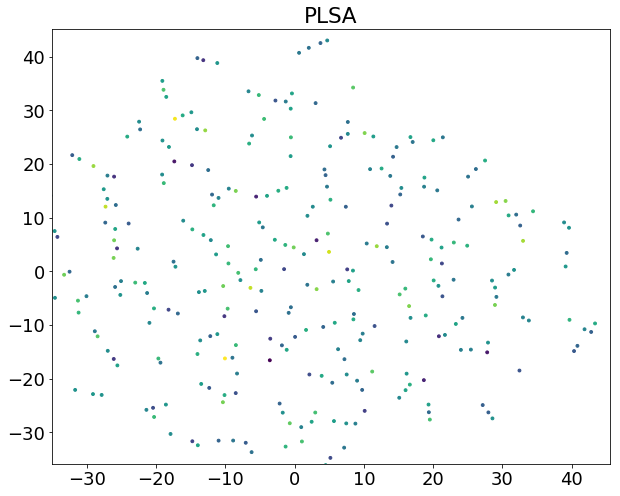

In [117]:
plot_tsne(d['phis'], d['perplexities'], 10, picture_path='check_uniqueness/pictures/plsa.eps', title='PLSA')

In [39]:
investigate_matrix_variance(d['phis'], shape=(T, W), max_size=9000)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in divide
  from ipykernel import kernelapp as app


Average pairwise MAE: 0.67338137791
Pairwise MAE std: 0.00276337974841


Average pairwise sMAPE: 1.29522820521
Pairwise sMAPE std: 0.00257911029926


Average pairwise KL: inf
Pairwise KL std: nan


Average pairwise KL2: 0.28459223353
Pairwise KL2 std: 0.00150206293071


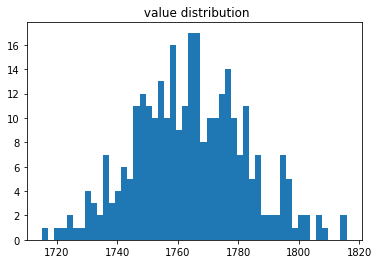

Average pairwise MAE: 20.6675427915
Pairwise MAE std: 15.4957825995


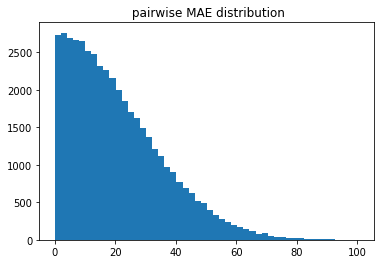

Average pairwise sMAPE: 0.0117121168929
Pairwise sMAPE std: 0.0087759274662


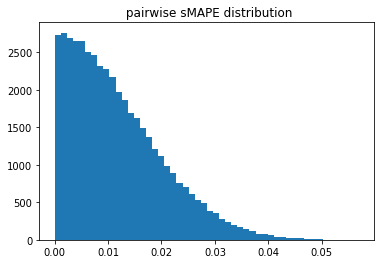

In [40]:
investigate_scalar_variance(d['perplexities'])

In [118]:
with open('uniqueness_exp/check_uniqueness/full_initialized_plsa.pkl', 'r') as f:
    d = pickle.load(f)

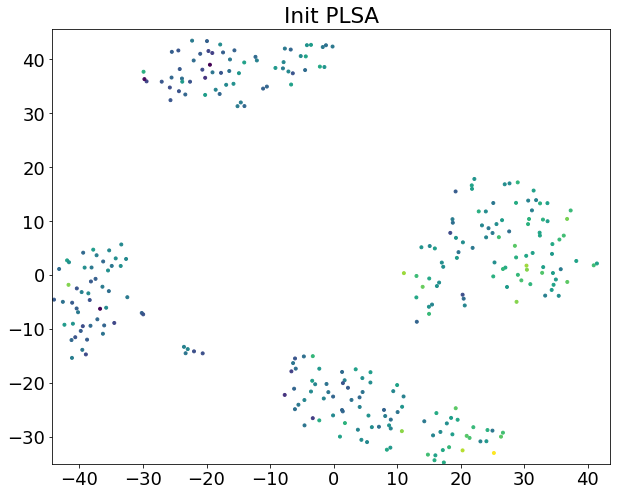

In [119]:
plot_tsne(d['phis'], d['perplexities'], 10, picture_path='check_uniqueness/pictures/full_initialized_plsa.eps', title='Init PLSA')

In [43]:
investigate_matrix_variance(d['phis'], shape=(T, W), max_size=9000)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


Average pairwise MAE: 0.0264363567928
Pairwise MAE std: 0.000173739811135


Average pairwise sMAPE: 0.0696145887691
Pairwise sMAPE std: 0.00025541757177


Average pairwise KL: inf
Pairwise KL std: nan


Average pairwise KL2: 0.00229283362
Pairwise KL2 std: 1.75632831404e-05


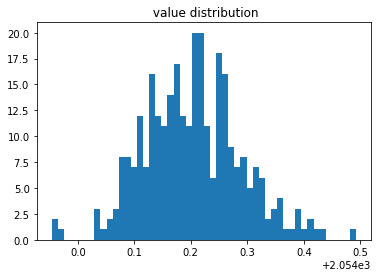

Average pairwise MAE: 0.09637819732
Pairwise MAE std: 0.0739181223242


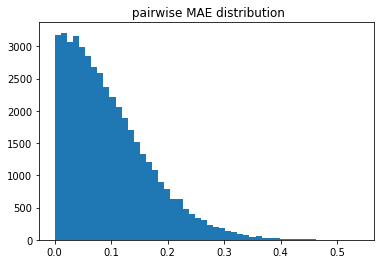

Average pairwise sMAPE: 4.69174518377e-05
Pairwise sMAPE std: 3.5983572664e-05


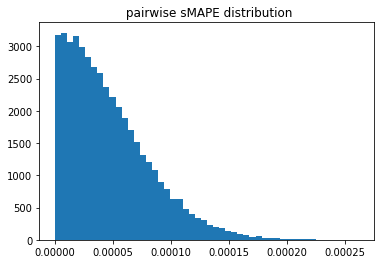

In [44]:
investigate_scalar_variance(d['perplexities'])

In [45]:
check_phis(d['init_phi'], d['phis'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


Average MAE: 0.253868324422
MAE std: 0.00679998424861
Min MAE: 0.0185518890803

Average sMAPE: 0.0647231067592
sMAPE std: 0.00105871163047
Min sMAPE: 0.008313155251

Average greed MAE: 0.0253868324422
greed MAE std: 0.000679998424861

Average greed sMAPE: 0.0656214465625
greed sMAPE std: 0.00107539108621

Average greed KL: inf
greed KL std: nan

Average greed KL2: 0.00203228691215
greed KL2 std: 6.18651689476e-05


In [120]:
with open('uniqueness_exp/check_uniqueness/syntetic_plsa.pkl', 'r') as f:
    d = pickle.load(f)

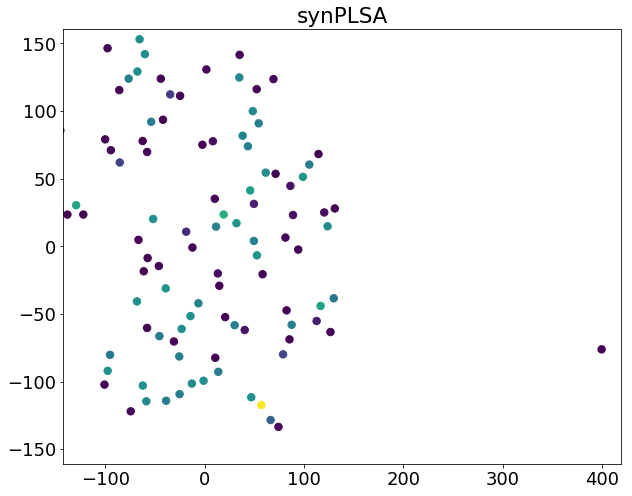

In [121]:
plot_tsne(d['phis'], d['perplexities'], 7, picture_path='check_uniqueness/pictures/syntetic_plsa.eps', title='synPLSA')

In [48]:
investigate_matrix_variance(d['phis'], shape=(T, W), max_size=1000)

Average pairwise MAE: 0.137309947773
Pairwise MAE std: 0.0128098125289


Average pairwise sMAPE: 1.24730857895
Pairwise sMAPE std: 0.0137302354353


Average pairwise KL: 0.331028563156
Pairwise KL std: 0.0486805330524


Average pairwise KL2: 0.0442314407084
Pairwise KL2 std: 0.00458799536441


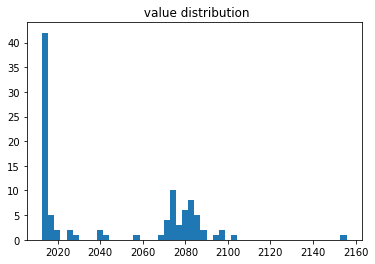

Average pairwise MAE: 36.9158262182
Pairwise MAE std: 32.0234506347


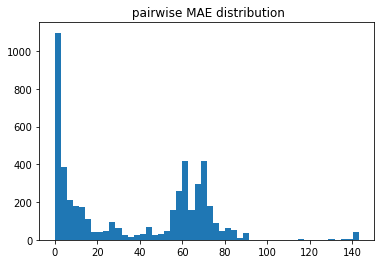

Average pairwise sMAPE: 0.0179950629699
Pairwise sMAPE std: 0.0155768678908


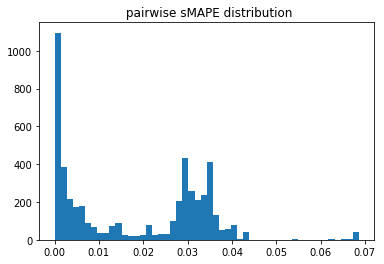

In [49]:
investigate_scalar_variance(d['perplexities'])

In [50]:
check_phis(d['init_phi'], d['phis'])

Average MAE: 14.5904118263
MAE std: 0.642194483563
Min MAE: 0.0261283779671

Average sMAPE: 1.85823362596
sMAPE std: 0.0228489759928
Min sMAPE: 1.27752152605

Average greed MAE: 0.0959431349549
greed MAE std: 0.0259222463614

Average greed sMAPE: 1.38674989555
greed sMAPE std: 0.0129415159253

Average greed KL: 0.0553720993249
greed KL std: 0.0159186174599

Average greed KL2: 0.0331665715584
greed KL2 std: 0.00950944062569


In [122]:
with open('uniqueness_exp/check_uniqueness/full_initialized_syntetic_plsa.pkl', 'r') as f:
    d = pickle.load(f)

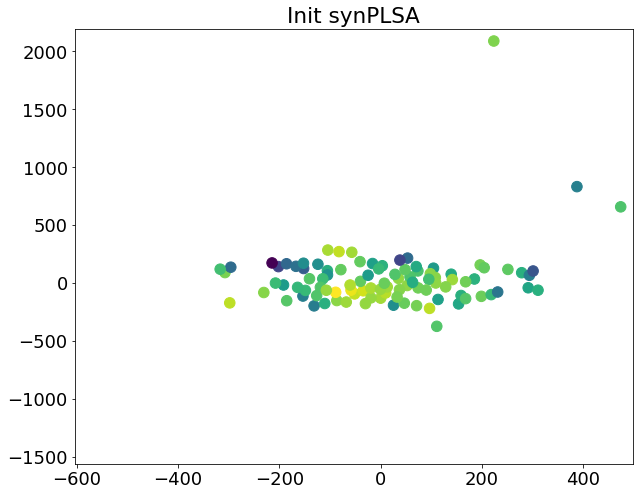

In [123]:
plot_tsne(d['phis'], d['perplexities'], 7, picture_path='check_uniqueness/pictures/full_initialized_syntetic_plsa.eps', title='Init synPLSA')

In [53]:
investigate_matrix_variance(d['phis'], shape=(T, W), max_size=1000)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


Average pairwise MAE: 8.19764442349e-06
Pairwise MAE std: 3.4751236506e-07


Average pairwise sMAPE: 0.000324514037753
Pairwise sMAPE std: 8.1606538653e-06


Average pairwise KL: 1.12926762713e-07
Pairwise KL std: 1.28508699752e-08


Average pairwise KL2: 5.56470197066e-08
Pairwise KL2 std: 6.15880651923e-09


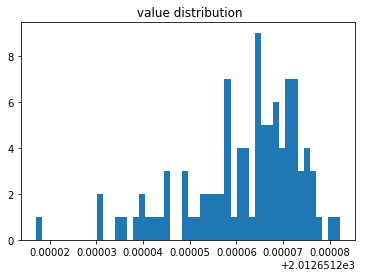

Average pairwise MAE: 1.34089915391e-05
Pairwise MAE std: 1.12429127265e-05


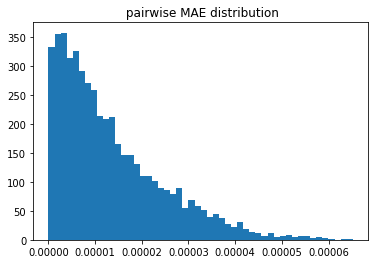

Average pairwise sMAPE: 6.66235220185e-09
Pairwise sMAPE std: 5.58612065687e-09


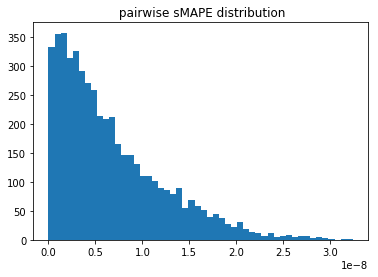

In [54]:
investigate_scalar_variance(d['perplexities'])

In [55]:
check_phis(d['init_phi'], d['phis'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


Average MAE: 0.000666822949462
MAE std: 5.987623671e-06
Min MAE: 0.000605634249658

Average sMAPE: 0.00310085839132
sMAPE std: 6.44672200613e-06
Min sMAPE: 0.00303305543479

Average greed MAE: 6.66822949462e-05
greed MAE std: 5.987623671e-07

Average greed sMAPE: 0.00308386646906
greed sMAPE std: 6.39747737342e-06

Average greed KL: 5.63262906068e-06
greed KL std: 8.24579523834e-08

Average greed KL2: 3.44870009628e-06
greed KL2 std: 5.40429744965e-08


In [126]:
with open('wntm_exp/plsa/exp_seed_777.pkl') as f:
    d = pickle.load(f)

IOError: [Errno 2] No such file or directory: 'wntm_exp/plsa/exp_seed_777.pkl'

In [101]:
np.max(np.abs(d['n_tw'] - np.transpose(d['n_dt'])))

2.347633198951371e-11

In [102]:
d['n_tw'].shape

(100, 99998)